# kaggle competition 다운

In [1]:
import os

In [2]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d)        Commands related to Kaggle datasets
    kernels (k)         Commands related to Kaggle kernels
    config              Configuration settings


In [3]:
!kaggle competition list

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'competition' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


## train, test set 준비

In [5]:
import pandas as pd
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')


In [6]:
train.shape


(1460, 81)

In [7]:
test.shape


(1459, 80)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
# 이상치 제거
train.drop(train[(train['OverallQual']<4) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['OverallCond']<4) & (train['SalePrice']>200000)].index, inplace=True)
test.reset_index(drop=True, inplace=True)

train.shape

(1458, 81)

## 종속 변수의 로그 변환


The value of mu before log transformation is: 180761.24142661178
The value of sigma before log transformation is: 79270.93617295024


<ipython-input-11-7dad7a638f58>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


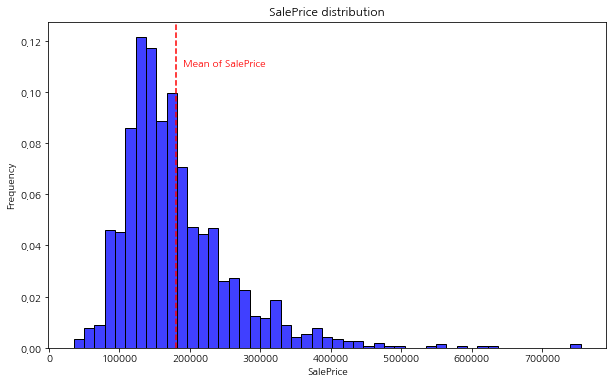

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(train['SalePrice'])
print('The value of mu before log transformation is:', mu)
print('The value of sigma before log transformation is:', sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color='b', stat='probability')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='SalePrice distribution')

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu+10000, 0.11, 'Mean of SalePrice', rotation=0, color='r')
fig.show()

* 주택 가격이 정규 분포를 이루지 않는 것을 알 수 있음

The value of mu before log transformation is: 12.0233397799989
The value of sigma before log transformation is: 0.3989191793099824


<ipython-input-12-4ca9b6466d84>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


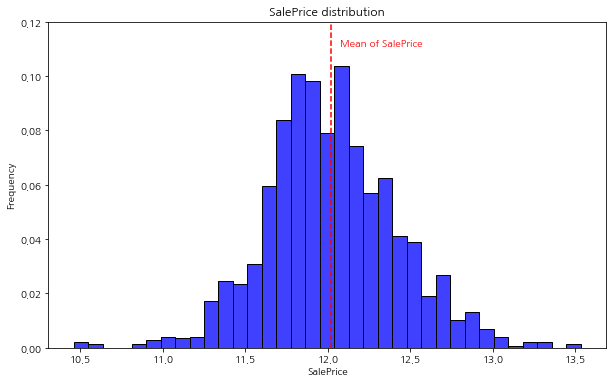

In [12]:
# np.log1p() 활용
import numpy as np
train['SalePrice']=np.log1p(train['SalePrice'])

(mu, sigma) = norm.fit(train['SalePrice'])
print('The value of mu before log transformation is:', mu)
print('The value of sigma before log transformation is:', sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color='b', stat='probability')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='SalePrice distribution')

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu+0.05, 0.111, 'Mean of SalePrice', rotation=0, color='r')
plt.ylim(0, 0.12)
fig.show()


## 데이터 합치기

In [13]:
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1458, 80), (1459, 79))

In [14]:
y = train['SalePrice'].reset_index(drop=True)
train = train.drop('SalePrice', axis=1)
train.shape, test.shape, y.shape
# 변수의 개수 동일 확인

((1458, 79), (1459, 79), (1458,))

In [15]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2913,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2914,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2915,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## 결측치 처리

In [16]:
# 결측치를 확인해 비율로 계산한 뒤 내림차순으로 정렬함
def check_na(data, head_num=10):
    isnull_na=(data.isnull().sum()/len(data))*100
    data_na=isnull_na.drop(isnull_na[isnull_na==0].index).sort_values(ascending=False)
    missing_data=pd.DataFrame({'Missing Ratio':data_na,
                                'Data Type': data.dtypes[data_na.index]})
    print('결측치 데이터 칼럼과 건수:\n', missing_data.head(head_num))
check_na(all_df, 20)

결측치 데이터 칼럼과 건수:
               Missing Ratio Data Type
PoolQC            99.657182    object
MiscFeature       96.400411    object
Alley             93.212204    object
Fence             80.425094    object
FireplaceQu       48.680151    object
LotFrontage       16.626671   float64
GarageFinish       5.450806    object
GarageQual         5.450806    object
GarageCond         5.450806    object
GarageYrBlt        5.450806   float64
GarageType         5.382242    object
BsmtExposure       2.811107    object
BsmtCond           2.811107    object
BsmtQual           2.776826    object
BsmtFinType2       2.742544    object
BsmtFinType1       2.708262    object
MasVnrType         0.788481    object
MasVnrArea         0.754200   float64
MSZoning           0.137127    object
BsmtFullBath       0.068564   float64


In [17]:
# 변수 제거
all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)
check_na(all_df, 20)

결측치 데이터 칼럼과 건수:
               Missing Ratio Data Type
GarageCond         5.450806    object
GarageQual         5.450806    object
GarageYrBlt        5.450806   float64
GarageFinish       5.450806    object
GarageType         5.382242    object
BsmtCond           2.811107    object
BsmtExposure       2.811107    object
BsmtQual           2.776826    object
BsmtFinType2       2.742544    object
BsmtFinType1       2.708262    object
MasVnrType         0.788481    object
MasVnrArea         0.754200   float64
MSZoning           0.137127    object
Functional         0.068564    object
Utilities          0.068564    object
BsmtFullBath       0.068564   float64
BsmtHalfBath       0.068564   float64
GarageArea         0.034282   float64
GarageCars         0.034282   float64
TotalBsmtSF        0.034282   float64


In [18]:
# 문자열 데이터 변환
import numpy as np

cat_all_vars = train.select_dtypes(exclude=[np.number])
print('all_vars:', len(list(cat_all_vars))) 

final_cat_vars=[]
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']:
        final_cat_vars.append(v)
print('final_cat_vars:', len(final_cat_vars))

for i in final_cat_vars:
    all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

check_na(all_df, 20)

all_vars: 43
final_cat_vars: 38
결측치 데이터 칼럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.450806   float64
MasVnrArea         0.754200   float64
BsmtFullBath       0.068564   float64
BsmtHalfBath       0.068564   float64
BsmtFinSF1         0.034282   float64
BsmtFinSF2         0.034282   float64
BsmtUnfSF          0.034282   float64
TotalBsmtSF        0.034282   float64
GarageCars         0.034282   float64
GarageArea         0.034282   float64


In [19]:
# 수치형 데이터 

num_all_vars = list(train.select_dtypes(include=[np.number]))
print('all_vars:', len(num_all_vars))

num_all_vars.remove('LotFrontage')
print('final_cat_vars:', len(num_all_vars))

for i in num_all_vars:
    all_df[i].fillna(value=all_df[i].median(), inplace=True)

check_na(all_df, 20)


all_vars: 36
final_cat_vars: 35
결측치 데이터 칼럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


In [20]:
# 수치형 데이터의 왜도 (내림차순으로 정렬)
from scipy.stats import skew

def find_skew(x):
    return skew(x)
skew_features = all_df[num_all_vars].apply(find_skew).sort_values(ascending=False)
skew_features

MiscVal          21.939672
PoolArea         16.892477
LotArea          12.867139
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.318923
BsmtFinSF2        4.144503
EnclosedPorch     4.013741
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.615714
OpenPorchSF       2.534326
WoodDeckSF        1.841876
1stFlrSF          1.469798
BsmtFinSF1        1.429239
MSSubClass        1.374726
GrLivArea         1.271773
TotalBsmtSF       1.165468
BsmtUnfSF         0.919795
2ndFlrSF          0.860643
TotRmsAbvGrd      0.760404
Fireplaces        0.734449
HalfBath          0.695072
BsmtFullBath      0.626733
OverallCond       0.584601
BedroomAbvGr      0.329555
GarageArea        0.241611
OverallQual       0.196514
MoSold            0.195229
FullBath          0.164226
YrSold            0.132129
GarageCars       -0.218309
GarageYrBlt      -0.398311
YearRemodAdd     -0.451063
YearBuilt        -0.600023
dtype: float64

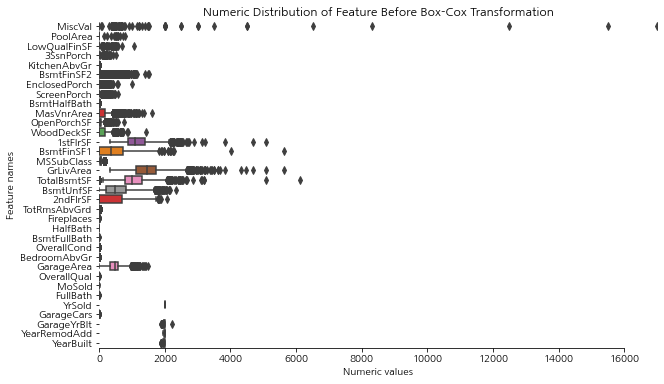

In [21]:
# 시각화
skewnewss_index = list(skew_features.index)
skewnewss_index.remove('LotArea')
all_numeric_df = all_df.loc[:, skewnewss_index]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, all_numeric_df.max().sort_values(ascending=False)[0])
ax=sns.boxplot(data=all_numeric_df[skewnewss_index], orient='h', palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel='Feature names')
ax.set(xlabel='Numeric values')
ax.set(title='Numeric Distribution of Feature Before Box-Cox Transformation')
sns.despine(trim=True, left=True)

* 왜도가 높으면 높을수록 box가 잘 나타나지 않는 것을 볼 수 있음.
* 이렇게 가공되지 않은 수치형 변수들을 입력 변수로 활용하면
 특히 수치형 데이터를 예측해야 하는 시점에서 선형 회귀와 같은 알고리즘을 사용할 때 입력값이 왜곡되어 떨어질 수도 있음
* 이러한 경우 Box-Cox Transformation을 시도

In [22]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_features[skew_features>1]
high_skew_index = high_skew.index
print('before Box-Cox Transformation: \n', all_df[high_skew_index].head())

for num_var in high_skew_index:
    all_df[num_var]=boxcox1p(all_df[num_var], boxcox_normmax(all_df[num_var]+1))

print('after Box-Cox Transformation: \n' , all_df[high_skew_index].head())


before Box-Cox Transformation: 
    MiscVal  PoolArea  LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0        0         0     8450             0          0             1   
1        0         0     9600             0          0             1   
2        0         0    11250             0          0             1   
3        0         0     9550             0          0             1   
4        0         0    14260             0          0             1   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0              0            0           0.0       196.0   
1         0.0              0            0           1.0         0.0   
2         0.0              0            0           0.0       162.0   
3         0.0            272            0           0.0         0.0   
4         0.0              0            0           0.0       350.0   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0           61           0      

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


## 도출 변수 생성

In [23]:
# 새로운 변수 생성 후 기존 변수 삭제 
all_df['TotalSF']=all_df['TotalBsmtSF']+all_df['1stFlrSF']+all_df['2ndFlrSF']
all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)

print(all_df.shape)

(2917, 74)


In [24]:
# 0.5는 Half의 의미를 포함하는 것으로 추가함
all_df['Total_Bathrooms']=(all_df['FullBath']+(0.5*all_df['HalfBath'])+all_df['BsmtFullBath']+(0.5*all_df['BsmtHalfBath']))

all_df['Total_porch_sf']=(all_df['OpenPorchSF']+all_df['3SsnPorch']+all_df['EnclosedPorch']+all_df['ScreenPorch'])

all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
                      'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)

print(all_df.shape)


(2917, 68)


In [25]:
# 연도와 관련 있는 변수를 추출

num_all_vars=list(train.select_dtypes(include=[np.number]))
year_feature=[]
for var in num_all_vars:
    if 'Yr' in var:
        year_feature.append(var)
    elif 'Year' in var:
        year_feature.append(var)
    else:
        print(var, 'is not related with Year')
print(year_feature)

MSSubClass is not related with Year
LotFrontage is not related with Year
LotArea is not related with Year
OverallQual is not related with Year
OverallCond is not related with Year
MasVnrArea is not related with Year
BsmtFinSF1 is not related with Year
BsmtFinSF2 is not related with Year
BsmtUnfSF is not related with Year
TotalBsmtSF is not related with Year
1stFlrSF is not related with Year
2ndFlrSF is not related with Year
LowQualFinSF is not related with Year
GrLivArea is not related with Year
BsmtFullBath is not related with Year
BsmtHalfBath is not related with Year
FullBath is not related with Year
HalfBath is not related with Year
BedroomAbvGr is not related with Year
KitchenAbvGr is not related with Year
TotRmsAbvGrd is not related with Year
Fireplaces is not related with Year
GarageCars is not related with Year
GarageArea is not related with Year
WoodDeckSF is not related with Year
OpenPorchSF is not related with Year
EnclosedPorch is not related with Year
3SsnPorch is not rela

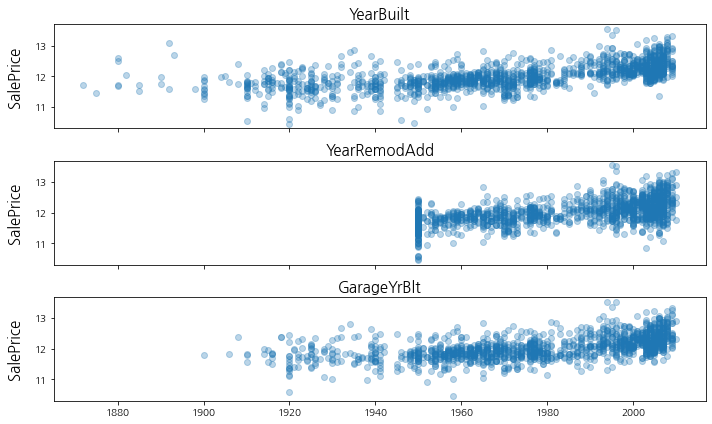

In [26]:
# SalePrice와 연관지어서 시각화 
fig, ax= plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
for i, var in enumerate(year_feature):
    if var != 'YrSold':
        ax[i].scatter(train[var], y, alpha=0.3)
        ax[i].set_title('{}'.format(var), size=15)
        ax[i].set_ylabel('SalePrice', size=15, labelpad=12.5)
plt.tight_layout()
plt.show()

* 2000년대로 올수록 SalePrice의 가격이 모두 우측으로 상향하는 것을 볼 수 있음
* 리모델링만 기준삼고 나머지 변수는 삭제합니다

In [27]:
all_df=all_df.drop(['YearBuilt', 'GarageYrBlt'], axis=1)
print(all_df.shape)

(2917, 66)


<ipython-input-28-db3c3f886b37>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


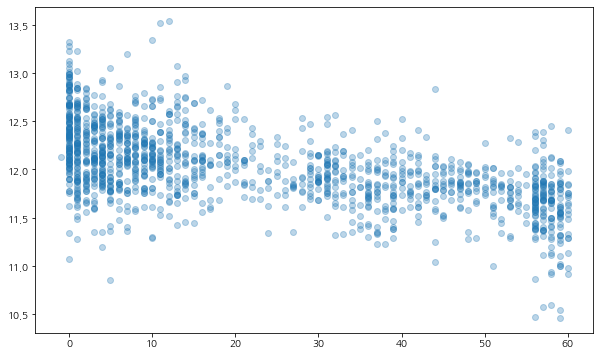

In [28]:
# YrSold와 YearRemodAdd 연도 차이 값에 대한 도출 변수 생성 
# 도출된 값이 클수록 SalePrice의 값이 하향하는 그래프 기대
YearSinceRemodel=train['YrSold'].astype(int)-train['YearRemodAdd'].astype(int)

fig, ax=plt.subplots(figsize=(10, 6))
ax.scatter(YearSinceRemodel, y, alpha=0.3)
fig.show()

In [29]:
# 차이 값 저장하는 코드 작성 후, YrSold와 YearRemodAdd 변수 삭제

all_df['YearSinceRemodel']=all_df['YrSold'].astype(int)-all_df['YearRemodAdd'].astype(int)

all_df=all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)

print(all_df.shape)


(2917, 65)


## 더미 변수의 응용

In [30]:
all_df['PoolArea'].value_counts()

0.000000    2904
4.721829       1
6.048366       1
5.922801       1
5.913421       1
5.718338       1
5.843016       1
5.945809       1
5.854879       1
5.130821       1
5.553561       1
6.231252       1
5.786591       1
6.161330       1
Name: PoolArea, dtype: int64

In [31]:
# Data Binding - 연속형 변수를 재그룹화하는 개념
def count_dummy(x):
    if x>0:
        return 1
    else:
        return 0

all_df['PoolArea']=all_df['PoolArea'].apply(count_dummy)
all_df['PoolArea'].value_counts()

0    2904
1      13
Name: PoolArea, dtype: int64

In [32]:
# GarageArea 변수와 Fireplaces 변수에도 적용
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

1    2760
0     157
Name: GarageArea, dtype: int64

In [33]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()


1    1497
0    1420
Name: Fireplaces, dtype: int64

In [34]:
# Label Encoding - 문자열 데이터를 각 범주의 개수에 따라 숫자로 변환
# ex) FoodName 내 값의 개수가 10개 -> 1~10으로 변환되어 저장

from sklearn.preprocessing import LabelEncoder

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'],
                      'Calories': [95, 231, 50]})

encoder=LabelEncoder()
encoder.fit(temp['Food_Name'])
labels = encoder.transform(temp['Food_Name'])
print(list(temp['Food_Name']), "===>", labels)

['Apple', 'Chicken', 'Broccoli'] ===> [0 2 1]


In [35]:
# OrdinalEncoding - 입력하는 형태를 배열로 바꿔야 하며, 반환값의 형태로 실수형이 출력

from sklearn.preprocessing import OrdinalEncoder

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'],
                     'Calories': [95, 231, 50]})

encoder = OrdinalEncoder()
labels = encoder.fit_transform(temp[['Food_Name']])
print(list(temp['Food_Name']), "===>", labels.tolist())


['Apple', 'Chicken', 'Broccoli'] ===> [[0.0], [2.0], [1.0]]


In [36]:
import pandas as pd
temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'],
                     'Calories': [95, 231, 50]})

temp[['Food_No']] = temp.Food_Name.replace(to_replace=['Chicken', 'Broccoli', 'Apple'],
                                           value=[1, 2, 3])

print(temp[['Food_Name', 'Food_No']])


  Food_Name  Food_No
0     Apple        3
1   Chicken        1
2  Broccoli        2


In [37]:
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'],
                     'Calories': [95, 231, 50]})

temp = pd.get_dummies(temp)
print(temp)
print(temp.shape)


   Calories  Food_Name_Apple  Food_Name_Broccoli  Food_Name_Chicken
0        95                1                   0                  0
1       231                0                   0                  1
2        50                0                   1                  0
(3, 4)


In [38]:
all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape


(2917, 261)

## 머신러닝 모형 학습 및 평가

In [39]:
# 데이터셋 분리 및 교차 검증
X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape


((1458, 261), (1458,), (1459, 261))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1093, 261), (365, 261), (1093,), (365,))

### 평가지표

In [41]:
# MAE
import numpy as np


def mean_absolute_error(y_true, y_pred):

  error = 0
  for yt, yp in zip(y_true, y_pred):
    error = error + np.abs(yt-yp)

  mae = error / len(y_true)
  return mae


In [42]:
# MSE
import numpy as np


def mean_squared_error(y_true, y_pred):

  error = 0
  for yt, yp in zip(y_true, y_pred):
    error = error + (yt - yp) ** 2

  mse = error / len(y_true)
  return mse


In [43]:
# RMSE
import numpy as np


def root_rmse_squared_error(y_true, ypred):
  error = 0

  for yt, yp in zip(y_true, y_pred):
    error = error + (yt - yp) ** 2

  mse = error / len(y_true)
  rmse = np.round(np.sqrt(mse), 3)
  return rmse


In [44]:
# Test 1
y_true = [400, 300, 800]
y_pred = [380, 320, 777]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", root_rmse_squared_error(y_true, y_pred))


MAE: 21.0
MSE: 443.0
RMSE: 21.048


In [45]:
# Test 2
y_true = [400, 300, 800, 900]
y_pred = [380, 320, 777, 600]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", root_rmse_squared_error(y_true, y_pred))


MAE: 90.75
MSE: 22832.25
RMSE: 151.103


In [46]:
# RMSE
from sklearn.metrics import mean_squared_error


def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


## 모형 정의 및 검증 평가


In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression


def cv_rmse(model, n_folds=5):
    cv = KFold(n_splits=n_folds, random_state=42, shuffle=True)
    rmse_list = np.sqrt(-cross_val_score(model, X, y,
                        scoring='neg_mean_squared_error', cv=cv))
    print('CV RMSE value list:', np.round(rmse_list, 4))
    print('CV RMSE mean value:', np.round(np.mean(rmse_list), 4))
    return (rmse_list)


n_folds = 5
rmse_scores = {}
lr_model = LinearRegression()


In [64]:
score = cv_rmse(lr_model, n_folds)
print(
    "linear regression - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())


CV RMSE value list: [  3698.9735  10501.1926  47737.4103 269031.6096   6553.2519]
CV RMSE mean value: 67504.4876
linear regression - mean: 67504.4876 (std: 102019.1067)


## 첫번째 최종 예측 값 제출

In [49]:
from sklearn.model_selection import cross_val_predict

X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

lr_model_fit = lr_model.fit(X, y)
final_preds = np.floor(np.expm1(lr_model_fit.predict(X_test)))
print(final_preds)


[116863. 157901. 187931. ... 175204. 115955. 217724.]


<ipython-input-49-b202750c01c7>:8: RuntimeWarning: overflow encountered in expm1
  final_preds = np.floor(np.expm1(lr_model_fit.predict(X_test)))


In [51]:
submission = pd.read_csv(
    "house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:, 1] = final_preds
print(submission.head())
submission.to_csv("The_first_regression.csv", index=False)


     Id  SalePrice
0  1461   116863.0
1  1462   157901.0
2  1463   187931.0
3  1464   197369.0
4  1465   200221.0


In [52]:
### 모형 알고리즘 추가
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# LinearRegresison
lr_model = LinearRegression()

# Tree Decision 
tree_model = DecisionTreeRegressor()

# Random Forest Regressor
rf_model = RandomForestRegressor()

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()

In [62]:
score = cv_rmse(lr_model, n_folds)
print(
    "linear regression - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())


CV RMSE value list: [  3698.9735  10501.1926  47737.4103 269031.6096   6553.2519]
CV RMSE mean value: 67504.4876
linear regression - mean: 67504.4876 (std: 102019.1067)


In [57]:
score = cv_rmse(tree_model, n_folds)
print(
    "Decision Tree Regressor - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['Decision Tree Regressor'] = (score.mean(), score.std())


CV RMSE value list: [0.2088 0.1977 0.2215 0.2026 0.1742]
CV RMSE mean value: 0.201
Decision Tree Regressor - mean: 0.2010 (std: 0.0156)


In [58]:
score = cv_rmse(rf_model, n_folds)
print(
    "RandomForest Regressor - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['RandomForest Regressor'] = (score.mean(), score.std())


CV RMSE value list: [0.1471 0.1536 0.1452 0.1367 0.1261]
CV RMSE mean value: 0.1418
RandomForest Regressor - mean: 0.1418 (std: 0.0095)


In [59]:
score = cv_rmse(gbr_model, n_folds)
print(
    "Gradient Boosting Regressor - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['Gradient Boosting Regressor'] = (score.mean(), score.std())


CV RMSE value list: [0.1408 0.1375 0.1369 0.1218 0.1143]
CV RMSE mean value: 0.1303
Gradient Boosting Regressor - mean: 0.1303 (std: 0.0103)


In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.pointplot(x=list(rmse_scores.keys()), y=[
                   score for score, _ in rmse_scores.values()], markers=['o'], linestyles=['-'], ax=ax)
for i, score in enumerate(rmse_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]),
            horizontalalignment='left', size='large', color='black', weight='semibold')

ax.set_ylabel('Score (RMSE)', size=20, labelpad=12.5)
ax.set_xlabel('Model', size=20, labelpad=12.5)
ax.tick_params(axis='x', labelsize=13.5, rotation=10)
ax.tick_params(axis='y', labelsize=12.5)
ax.set_ylim(0, 0.25)
ax.set_title('Rmse Scores of Models without Blended_Predictions', size=20)

fig.show()


<ipython-input-60-195374f3034b>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ValueError: Image size of 657x88069163 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x432 with 1 Axes>